<a href="https://colab.research.google.com/github/emike-akagbosu/MammoX/blob/main/Copy_of_Random_Forest_Full_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from skimage.morphology import area_closing, area_opening
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import cv2
from google.colab.patches import cv2_imshow

Perform Exploratory Data Analysis (EDA)

In [ ]:
data_path = "/content/drive/MyDrive/images"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#filepaths = glob.glob('{}*.png'.format(data_path), recursive=True)
filepaths = glob("/content/drive/MyDrive/images/images/**/*.png", recursive=True)
#filepaths = glob('{}*.png'.format(data_path))
print("Number of files: {}".format(len(filepaths)))
#fig, axis = plt.subplots(1,len(filepaths), figsize=(16,8))
#for x, ax in zip(filepaths, axis.flatten()):
#    ax.imshow(imread(x))
#    ax.set_title(x.split('\\')[1])
print("The shape of the image is:", imread(filepaths[0]).shape)

Number of files: 1258
The shape of the image is: (720, 335)


In [ ]:
#display(filepaths)
print(filepaths[0])
print(filepaths[500])
print(filepaths[1000])
print(filepaths[200])

/content/drive/MyDrive/images/images/train/1/A_0290_1.LEFT_CC.png
/content/drive/MyDrive/images/images/train/2/B_3615_1.RIGHT_CC.png
/content/drive/MyDrive/images/images/train/3/A_0329_1.LEFT_CC.png
/content/drive/MyDrive/images/images/train/4/A_0268_1.RIGHT_CC.png


Apply image Binarization

<ipython-input-237-320e544e56bc>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_img = rgb2gray(img)


48

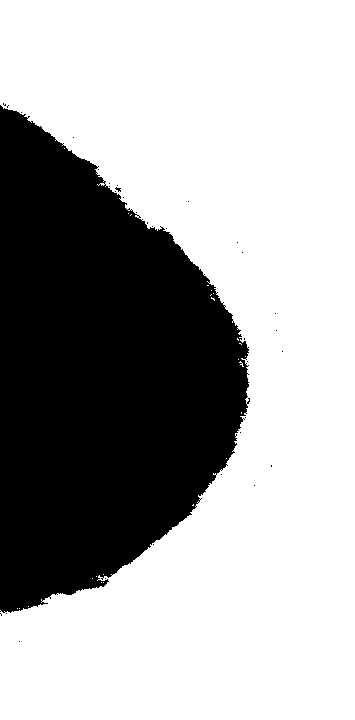

-1

In [ ]:
img = imread(filepaths[200])
gray_img = rgb2gray(img)

thresh = threshold_otsu(gray_img)
display(thresh)
binarized = gray_img < thresh

binarized = binarized.astype(np.uint8)  #convert to an unsigned byte
binarized*=255

cv2_imshow(np.array(binarized, dtype = np.uint8 ) )
cv2.waitKey(0)

In [ ]:
display(binarized)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
[print(x) for x in binarized]

Streaming output truncated to the last 5000 lines.
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 255   0 255 255 255 255 255 255 255 255 255 255 255 255


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Apply morphological operations

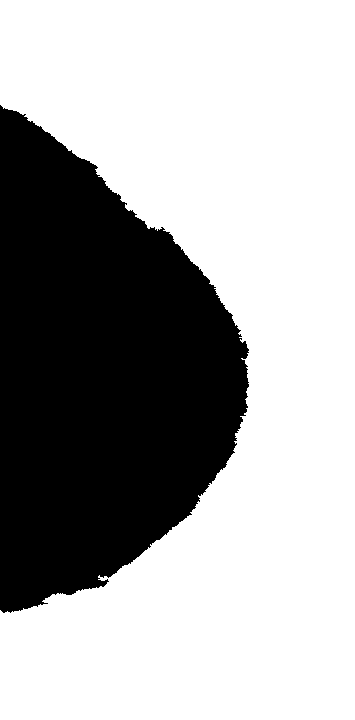

In [ ]:
closed = area_closing(binarized)
opened = area_opening(closed)
cv2_imshow(opened)

Label each Region using connected components

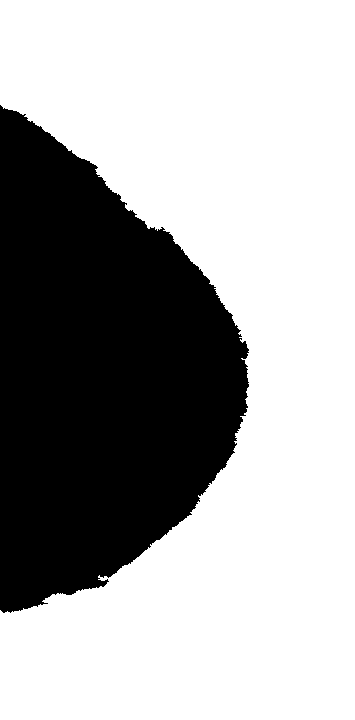

In [ ]:
label_im = label(opened)
regions = regionprops(label_im)
cv2_imshow(label_im*255)

In [ ]:
#display(label_im)
[print(x) for x in label_im]

Look at regions individually

In [ ]:
masks = []
bbox = []
for num, x in enumerate(regions):
    area = x.area
    convex_area = x.convex_area
    if num!=0 and x.area >= 100: 
        masks.append(regions[num].convex_image)
        bbox.append(regions[num].bbox)    
count = len(masks)
fig, axis = plt.subplots(4, int(count/4), figsize=(15,6))
for ax, box, mask in zip(axis.flatten(), bbox, masks):
    image  =  gray_img[box[0]:box[2], box[1]:box[3]] * mask
    ax.imshow(image)
    ax.axis('off')

<Figure size 1080x432 with 0 Axes>

Get the properties of each region

In [ ]:
properties = ['area','convex_area','bbox_area',
              'major_axis_length', 'minor_axis_length', 
              'perimeter', 'equivalent_diameter',
              'mean_intensity', 'solidity', 'eccentricity']
pd.DataFrame(regionprops_table(gray_img, gray_img, 
                               properties=properties)).head(10)

,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity
0,6,1360,4964,205.108923,19.632650,0.000000,2.763953,1.0,0.004412,0.995408
1,12,3798,8560,294.236398,34.991236,0.000000,3.908820,2.0,0.003160,0.992904
2,45,15774,26406,321.762462,74.708107,4.414214,7.569398,3.0,0.002853,0.972672
3,87,21611,33652,334.619316,89.934265,4.828427,10.524820,4.0,0.004026,0.963206
4,174,61946,126420,328.965244,113.616665,33.384776,14.884343,5.0,0.002809,0.938464
5,371,63608,132345,387.721795,153.784417,125.982756,21.734118,6.0,0.005833,0.917976
6,568,68819,139113,428.427302,160.875072,223.752309,26.892379,7.0,0.008254,0.926822
7,807,82802,143838,496.857481,205.154897,304.527958,32.054708,8.0,0.009746,0.910774
8,1010,83214,151522,560.353350,223.025346,339.356385,35.860451,9.0,0.012137,0.917382
9,1354,96657,156975,624.441848,246.308906,583.286363,41.520674,10.0,0.014008,0.918919


Combine into a single function

In [ ]:
def get_properties(name):
    filepaths = glob("/content/drive/MyDrive/images/images/train/{}/*".format(name), recursive=True)
    print(len(filepaths))
    properties = ['area','convex_area',
                 'bbox_area','major_axis_length', 
                 'minor_axis_length', 'perimeter',  
                 'equivalent_diameter', 'mean_intensity',  
                 'solidity', 'eccentricity']
    dataframe = pd.DataFrame(columns=properties)
    for file in filepaths:
        grayscale = rgb2gray(imread(file))
        threshold = threshold_otsu(grayscale)
        binarized = grayscale < threshold         
        closed = area_closing(binarized,1000)
        opened = area_opening(closed,1000)
        labeled = label(opened)
        regions = regionprops(labeled)
        data = pd.DataFrame(regionprops_table(grayscale, grayscale,
                            properties=properties))
        data = data[(data.index!=0) & (data.area>100)]
        dataframe = pd.concat([dataframe, data])
    return dataframe

Extract dataframe for Density 1

In [ ]:
density1 = get_properties('1')
density1['type'] = '1'
print("The shape of the dataframe is: ", density1.shape)
density1.head()


174


<ipython-input-252-5650471c3c66>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale = rgb2gray(imread(file))


The shape of the dataframe is:  (25276, 11)


,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity,type
5,144,66353,126888,542.527243,102.160299,34.627417,13.540550,6.0,0.002170,0.982111,1
6,249,101032,159651,808.711311,113.076053,66.698485,17.805523,7.0,0.002465,0.990177,1
7,368,105809,175296,860.650962,184.509280,149.195959,21.646066,8.0,0.003478,0.976750,1
8,479,111629,177933,961.737032,235.678476,169.610173,24.695784,9.0,0.004291,0.969509,1
9,590,115345,184534,1005.072015,319.385409,179.681241,27.408235,10.0,0.005115,0.948167,1


In [ ]:
display(density1)

Extract dataframe for Density 2

In [ ]:
density2 = get_properties('2')
density2['type'] = '2'
print("The shape of the dataframe is: ", density2.shape)
density2.head()

466


<ipython-input-252-5650471c3c66>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale = rgb2gray(imread(file))


The shape of the dataframe is:  (71710, 11)


,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity,type
1,1490,103248,145656,763.313404,139.513606,895.080303,43.556020,9.0,0.014431,0.983155,2
2,5374,118934,175064,698.509407,261.895096,3408.266340,82.718736,10.0,0.045185,0.927051,2
3,6830,124489,187404,688.543462,374.297184,4778.288814,93.253558,11.0,0.054864,0.839340,2
4,4762,124958,192753,730.337858,422.399098,3366.638923,77.866339,12.0,0.038109,0.815781,2
5,2796,124302,195845,815.882076,405.406049,2098.681420,59.665549,13.0,0.022494,0.867812,2


Same for 3

In [ ]:
density3 = get_properties('3')
density3['type'] = '3'
print("The shape of the dataframe is: ", density3.shape)
density3.head()

334


<ipython-input-252-5650471c3c66>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale = rgb2gray(imread(file))


The shape of the dataframe is:  (56081, 11)


,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity,type
1,1563,115868,181841,649.205065,252.434079,389.439646,44.610239,2.0,0.013489,0.921307,3
2,2206,118644,184548,662.225019,279.193903,779.429545,52.997797,3.0,0.018593,0.906782,3
3,2486,117811,183467,693.193311,315.443193,876.234631,56.260763,4.0,0.021102,0.890462,3
4,2596,123265,190400,692.275337,331.173308,945.654942,57.491998,5.0,0.021060,0.878151,3
5,2285,122141,189040,723.831669,353.722763,701.867099,53.938413,6.0,0.018708,0.872463,3


And 4

In [ ]:
density4 = get_properties('4')
density4['type'] = '4'
print("The shape of the dataframe is: ", density4.shape)
density4.head()

260


<ipython-input-252-5650471c3c66>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grayscale = rgb2gray(imread(file))


The shape of the dataframe is:  (44060, 11)


,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity,type
1,210,3431,18600,102.685995,21.150212,130.604076,16.351768,2.0,0.061207,0.978558,4
2,252,11453,35904,151.120474,34.147057,125.876154,17.912464,3.0,0.022003,0.974137,4
3,223,12819,38640,206.793690,37.826526,84.148232,16.850294,4.0,0.017396,0.983128,4
4,269,30199,57057,277.979271,92.047136,97.390873,18.506794,5.0,0.008908,0.943585,4
5,344,30890,58976,372.004100,103.603487,157.195959,20.928316,6.0,0.011136,0.960436,4


Combine the information into a single data frame

In [ ]:
df = pd.concat([density1, density2, density3, density4])

In [ ]:
display(df)

In [ ]:
df['ratio_length'] = (df['major_axis_length'] / 
                      df['minor_axis_length'])
df['perimeter_ratio_major'] = (df['perimeter'] /  
                               df['major_axis_length'])
df['perimeter_ratio_minor'] = (df['perimeter'] /
                               df['minor_axis_length'])
df['area_ratio_convex'] = df['area'] / df['convex_area']
df['area_ratio_bbox'] = df['area'] / df['bbox_area']
df['peri_over_dia'] = df['perimeter'] / df['equivalent_diameter']
final_df = df[df.drop('type', axis=1).columns].astype(float)
final_df = final_df.replace(np.inf, 0)
final_df['type'] = df['type']

In [ ]:
display(final_df)

,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity,ratio_length,perimeter_ratio_major,perimeter_ratio_minor,area_ratio_convex,area_ratio_bbox,peri_over_dia,type
5,144.0,66353.0,126888.0,542.527243,102.160299,34.627417,13.540550,6.0,0.002170,0.982111,5.310549,0.063826,0.338952,0.002170,0.001135,2.557312,1
6,249.0,101032.0,159651.0,808.711311,113.076053,66.698485,17.805523,7.0,0.002465,0.990177,7.151924,0.082475,0.589855,0.002465,0.001560,3.745944,1
7,368.0,105809.0,175296.0,860.650962,184.509280,149.195959,21.646066,8.0,0.003478,0.976750,4.664540,0.173352,0.808610,0.003478,0.002099,6.892521,1
8,479.0,111629.0,177933.0,961.737032,235.678476,169.610173,24.695784,9.0,0.004291,0.969509,4.080716,0.176358,0.719668,0.004291,0.002692,6.867981,1
9,590.0,115345.0,184534.0,1005.072015,319.385409,179.681241,27.408235,10.0,0.005115,0.948167,3.146894,0.178774,0.562584,0.005115,0.003197,6.555739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,168.0,16511.0,29829.0,205.338356,93.166126,19.899495,14.625466,133.0,0.010175,0.891144,2.204002,0.096911,0.213592,0.010175,0.005632,1.360606,4
133,151.0,15570.0,28830.0,218.055230,105.550292,23.727922,13.865755,134.0,0.009698,0.875039,2.065889,0.108816,0.224802,0.009698,0.005238,1.711261,4
134,146.0,15077.0,29045.0,221.416635,96.600092,15.071068,13.634257,135.0,0.009684,0.899810,2.292095,0.068067,0.156015,0.009684,0.005027,1.105382,4
135,123.0,14683.0,26864.0,195.492098,102.875252,30.935029,12.514330,136.0,0.008377,0.850338,1.900283,0.158242,0.300704,0.008377,0.004579,2.471968,4


Split the training and test set

In [ ]:
X = final_df.drop('type', axis=1)
y = final_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                         test_size=0.25, 
                                         stratify = y, 
                                         random_state=1337)

In [ ]:
display(X)

Train a random forest classifier model

In [ ]:
RF = RandomForestClassifier(max_depth=35, n_estimators=150)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)
df = pd.DataFrame()
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]
df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)
importances = (X.columns[np.argsort(RF.feature_importances_)][-5:])
df.loc['Top 1 Feature Predictor', 'Details'] = importances[4]
df.loc['Top 2 Feature Predictor', 'Details'] = importances[3]
df.loc['Top 3 Feature Predictor', 'Details'] = importances[2]
df.loc['Top 4 Feature Predictor', 'Details'] = importances[1]
df.loc['Top 5 Feature Predictor', 'Details'] = importances[0]
display(df)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,1.0
Test Accuracy,0.695548
Top 1 Feature Predictor,bbox_area
Top 2 Feature Predictor,convex_area
Top 3 Feature Predictor,mean_intensity
Top 4 Feature Predictor,major_axis_length
Top 5 Feature Predictor,minor_axis_length
